In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; } </style>"))

import seaborn as sns
sns.set_style('darkgrid')

import numpy as np

In [2]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from skmultilearn.dataset import load_dataset


X_train, y_train, feature_names, label_names = load_dataset('emotions', 'train')
X_test, y_test, _, _ = load_dataset('emotions', 'test')

print(X_test[:2])

emotions:train - exists, not redownloading
emotions:test - exists, not redownloading
  (0, 0)	0.036299
  (0, 1)	0.064986
  (0, 2)	0.082104
  (0, 3)	-72.710462
  (0, 4)	7.92022
  (0, 5)	0.134279
  (0, 6)	2.546373
  (0, 7)	0.671063
  (0, 8)	1.589821
  (0, 9)	0.576485
  (0, 10)	0.089158
  (0, 11)	0.261224
  (0, 12)	0.167199
  (0, 13)	0.661612
  (0, 14)	0.13944
  (0, 15)	0.45341
  (0, 16)	0.018544
  (0, 17)	0.050505
  (0, 18)	0.037714
  (0, 19)	5.242584
  (0, 20)	1.617565
  (0, 21)	0.907755
  (0, 22)	0.790619
  (0, 23)	0.686233
  (0, 24)	0.454869
  (0, 25)	0.473198
  (0, 26)	0.428844
  (0, 27)	0.406465
  (0, 28)	0.477573
  (0, 29)	0.474959
  (0, 30)	0.448606
  (0, 31)	0.410911
  (0, 32)	0.017394
  (0, 33)	0.040446
  (0, 34)	0.009026
  (0, 35)	4.572766
  (0, 36)	1.308411
  (0, 37)	0.357039
  (0, 38)	0.695072
  (0, 39)	0.580675
  (0, 40)	0.262438
  (0, 41)	0.245005
  (0, 42)	0.212725
  (0, 43)	0.233836
  (0, 44)	0.319727
  (0, 45)	0.34079
  (0, 46)	0.247875
  (0, 47)	0.259447
  (0, 48)	0.028

In [3]:
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False)


In [4]:
edge_map = graph_builder.transform(y_train)
print("{} labels, {} edges".format(len(label_names), len(edge_map)))
print(edge_map)

6 labels, 14 edges
{(1, 2): 58.0, (0, 5): 61.0, (1, 5): 6.0, (0, 1): 33.0, (2, 3): 66.0, (2, 4): 60.0, (3, 4): 56.0, (4, 5): 9.0, (2, 5): 5.0, (0, 4): 4.0, (1, 4): 1.0, (0, 2): 9.0, (1, 3): 6.0, (3, 5): 2.0}


In [5]:
from skmultilearn.cluster.networkx import NetworkXLabelGraphClusterer
#  we define a helper function for visualization purposes
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }


clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')
partition = clusterer.fit_predict(X_train,y_train)
partition

array([[0, 1, 5],
       [2, 3, 4]])

In [6]:
from matplotlib import interactive
interactive(True)

<function community.community_louvain.best_partition>

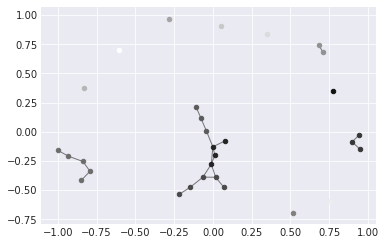

In [7]:
import community
import networkx as nx
import matplotlib.pyplot as plt

# Replace this with your networkx graph loading depending on your format !
G = nx.erdos_renyi_graph(30, 0.05)

#first compute the best partition
partition = community.best_partition(G)
community.best_partition
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

[(6, 7, 0.43209348383736246),
 (3, 2, 0.2928438125278191),
 (7, 8, 0.08353111239690192),
 (9, 1, 0.16989478774057465),
 (1, 2, 0.33835842616294076),
 (2, 6, 0.47168909595048125),
 (4, 1, 0.5659460220183072),
 (2, 5, 0.5632735807400766),
 (2, 8, 0.12195051802243706)]

{(1, 2): Text(0.0914745,0.151773,'0.33835842616294076'),
 (2, 1): Text(0.0914745,0.151773,'0.1'),
 (2, 4): Text(0.0327498,0.238825,'2.0'),
 (2, 5): Text(-0.0281375,0.600321,'0.5632735807400766'),
 (2, 6): Text(-0.117197,-0.159289,'0.47168909595048125'),
 (2, 8): Text(0.0729008,-0.305102,'0.12195051802243706'),
 (3, 1): Text(0.207722,0.197687,'0.75'),
 (3, 2): Text(0.0862321,0.246556,'0.2928438125278191'),
 (4, 1): Text(0.15424,0.189955,'0.5659460220183072'),
 (6, 7): Text(-0.226142,-0.628412,'0.43209348383736246'),
 (7, 8): Text(-0.0360445,-0.774225,'0.08353111239690192'),
 (9, 1): Text(0.0173739,0.148776,'0.16989478774057465')}

Text(0.5,1,'Pair-wise network')

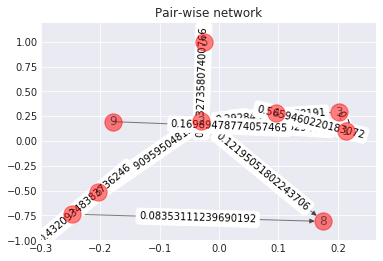

In [8]:
DG = nx.DiGraph()


random_edges = [(np.random.randint(1,10),np.random.randint(1,10),float(np.random.uniform(size=1)
 )) for i in range(1,10)]

random_edges

DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75), (2,1, 0.1), (2,4, 2.0)])
DG.add_weighted_edges_from(random_edges)


# Forcing a layout 
pos = nx.spring_layout(DG)

# Make a label dictionary: {}
new_labels = dict(map(lambda x: ((x[0],x[1]), x[2]['weight']), DG.edges(data=True)))
nx.draw_networkx(DG, pos=pos,alpha=0.5)
nx.draw_networkx_edge_labels(DG, pos=pos, edge_labels=new_labels)
plt.title('Pair-wise network')
plt.savefig('Large-graph')
plt.show()

In [9]:
nx.pagerank(DG)

{1: 0.21957319427489158,
 2: 0.2286028667546942,
 3: 0.03387879853679459,
 4: 0.15320324316048214,
 5: 0.06748495213329733,
 6: 0.06202081824146481,
 7: 0.08659600486624379,
 8: 0.11476132349533677,
 9: 0.03387879853679459}

{(1, 2): Text(0.232778,0.212228,'0.3'),
 (2, 3): Text(0.242677,-0.464259,'1.0'),
 (3, 2): Text(0.242677,-0.464259,'0.75'),
 (4, 3): Text(0.163581,0.0954892,'0.8'),
 (5, 3): Text(-0.101804,-0.484203,'0.6')}

Text(0.5,1,'Pair-wise network')

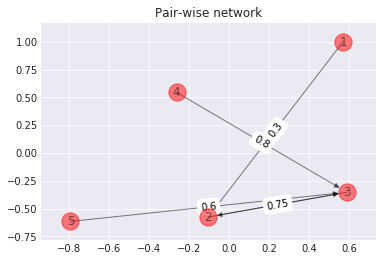

In [10]:
DG = nx.DiGraph()


# random_edges = [(np.random.randint(1,10),np.random.randint(1,10),float(np.random.uniform(size=1)) for i in range(1,20)]

# random_edges

DG.add_weighted_edges_from([(1, 2, 1), (3, 2, 0.75), (2,3, 1.0), (4,3,0.8),(5,3,0.6), (1,2, 0.3)])
# DG.add_weighted_edges_from(random_edges)


# Forcing a layout 
pos = nx.spring_layout(DG)

# Make a label dictionary: {}
new_labels = dict(map(lambda x: ((x[0],x[1]), x[2]['weight']), DG.edges(data=True)))
nx.draw_networkx(DG, pos=pos,alpha=0.5)
nx.draw_networkx_edge_labels(DG, pos=pos, edge_labels=new_labels)
plt.title('Pair-wise network')
plt.savefig('Pairwise')
plt.show()


In [37]:
A = np.ones(shape=(10,10))
B = A
B
A = A * 6
B



array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [118]:
def part():
    
    arr = list(np.random.randint(1,11,size=1000))
    
#     arr = [1,1,1,1,1,5]
    if (sum(arr) % 2) == 1:
         print('false')
    else:
        half = sum(arr) / 2
        arr = sorted(arr)
        for index in range(1,len(arr)):
            if int(sum(arr[:index])) == int(sum(arr[index:])):
                print("To be sorted into {} and {}".format(arr[:index], arr[index:]))
                break

part()


To be sorted into [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [115]:
arr = [1,2,3,4,5,6,7,8,9,10]
print(arr[5:])

[6, 7, 8, 9, 10]


In [10]:
# Returns true if arr[] can be  
# partitioned in two subsets of  
# equal sum, otherwise false 
def findPartition(arr, n): 
    tot = sum(arr)
    i, j = 0, 0
 
    if tot % 2 != 0: 
        return false 
      
    
    part_1 = np.asmatrix([[ True for i in range(n + 1)]  
                   for j in range(tot // 2 + 1)])
    
    
    part = [[ True for i in range(n + 1)]  
                   for j in range(tot // 2 + 1)]
    print("part : ", part_1)
    
    # initialize top row as true 
  
          
    # intialize leftmost column,  
    # except part[0][0], as 0 
    
    for i in range(1, tot // 2 + 1): 
        part[i][0] = False
      
    
    print(part)
    
    # fill the partition table in 
    # bottom up manner 
    for i in range(1, tot // 2 + 1): 
        for j in range(1, n + 1): 
            part[i][j] = part[i][j - 1] 
              
            if i >= arr[j - 1]: 
                part[i][j] = (part[i][j] or 
                              part[i - arr[j - 1]][j - 1]) 
          
    return part[tot // 2][n] 
      
# Driver Code 
arr = [3, 1, 1, 2, 2, 1] 
n = len(arr) 
if findPartition(arr, n) == True: 
    print("Can be divided into two",  
             "subsets of equal sum") 
else: 
    print("Can not be divided into ", 
          "two subsets of equal sum") 
  
# This code is contributed  
# by mohit kumar 29 

part :  [[ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]]
[[True, True, True, True, True, True, True], [False, True, True, True, True, True, True], [False, True, True, True, True, True, True], [False, True, True, True, True, True, True], [False, True, True, True, True, True, True], [False, True, True, True, True, True, True]]
Can be divided into two subsets of equal sum
